# 加载数据

In [343]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys, os
sys.path.insert(0, os.getcwd())

from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 加载数据
data = pd.read_csv('titanic.csv')

# 简单查看数据
data.info()
data.isnull().sum()
data['Fare'].describe()
data['Age'].describe()
data.mode().head(1)
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 简单的可视化进行分析

Survival Rate by Age Group:
 AgeGroup
Baby        0.704545
Child       0.424242
Teenager    0.403226
Adult       0.355556
OldAdult    0.420495
Old         0.227273
Name: Survived, dtype: float64
Survival Rate by Fare Group:
 FareGroup
Low          0.255079
Middle       0.464646
High         0.419540
Expensive    0.675497
Luxury       0.777778
Name: Survived, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_5992\234092384.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=data, ax=axes[0], palette="coolwarm")


<Axes: xlabel='AgeGroup', ylabel='Survived'>

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5992\234092384.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FareGroup", y="Survived", data=data, ax=axes[1], palette="coolwarm")


<Axes: xlabel='FareGroup', ylabel='Survived'>

Text(0.5, 1.0, 'Fare Distribution')

Text(0.5, 0, 'Fare Category')

Text(0, 0.5, 'Count')

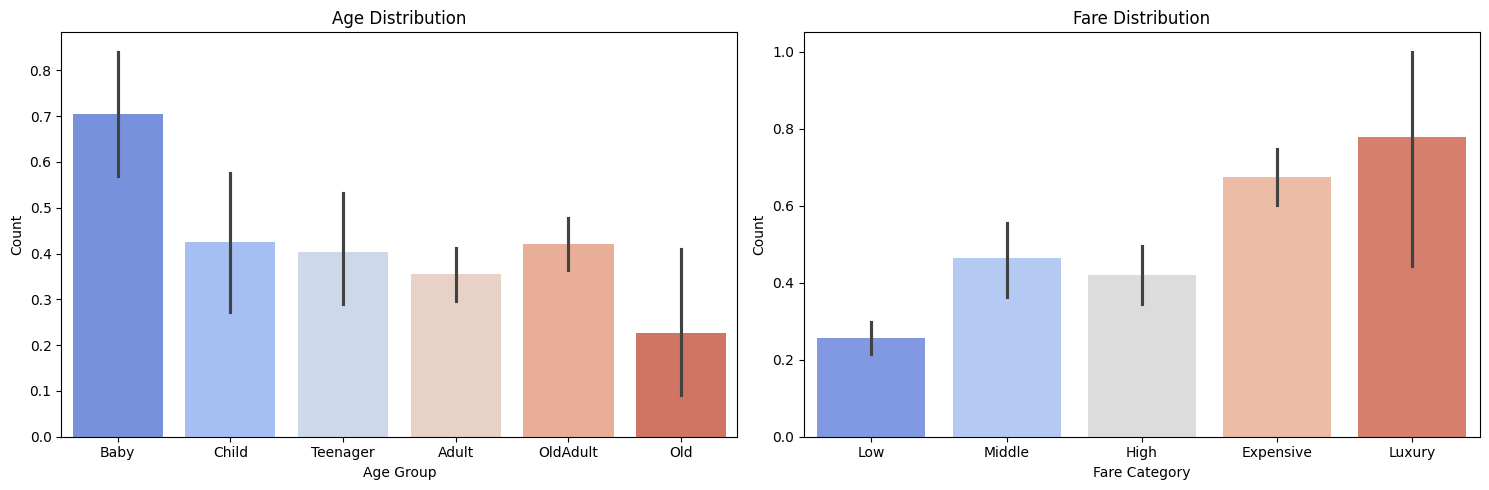

In [344]:
# 数据离散化
data["AgeGroup"] = pd.cut(
    data["Age"],
    bins=[0, 5, 14, 18, 30, 60, 100],
    labels=["Baby", "Child", "Teenager", "Adult", "OldAdult", "Old"],
)

data["FareGroup"] = pd.cut(
    data["Fare"],
    bins=[0, 15, 25, 50, 250, float("inf")],
    labels=["Low", "Middle", "High", "Expensive", "Luxury"],
)

survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
survival_by_fare_group = data.groupby('FareGroup')['Survived'].mean()

print("Survival Rate by Age Group:\n", survival_by_age_group)
print("Survival Rate by Fare Group:\n", survival_by_fare_group)

# 创建一个包含2个子图的画布
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


sns.barplot(x="AgeGroup", y="Survived", data=data, ax=axes[0], palette="coolwarm")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")


sns.barplot(x="FareGroup", y="Survived", data=data, ax=axes[1], palette="coolwarm")

axes[1].set_title("Fare Distribution")
axes[1].set_xlabel("Fare Category")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


# 特征处理
## 1、特征描述
- PassengerId => 乘客ID

- Pclass => 客舱等级(1/2/3等舱位)

- Name => 乘客姓名

- Sex => 性别

- Age => 年龄 

- SibSp => 兄弟姐妹数/配偶数

- Parch => 父母数/子女数

- Ticket => 船票编号

- Fare => 船票价格 

- Cabin => 客舱号 

- Embarked => 登船港口 

## 2、处理缺失值和离散值
- Embarked 缺失值众数填充为S
- 
- Fare 缺失值中位数填充，划分为不同等级
- 
- Cabin 取第一个字母作为类别，缺失值用 'N' 填充
- 
- Age 划分为不同年龄段


In [345]:
def preprocess_for_rf(data):
    """为随机森林算法准备数据

    Args:
        data (pandas.DataFrame): 原始数据

    Returns:
        pandas.DataFrame: 处理后的数据
    """
    # 处理缺失值
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  # 用众数填充缺失值
    data["Fare"].fillna(data["Fare"].median(), inplace=True)  # 用中位数填充缺失值
    data["Cabin"] = (
        data["Cabin"].fillna("N").map(lambda x: x[0])
    )  # 用'N'填充缺失值, 然后取第一个字母作为cabin类别
    
    # 处理姓名特征
    data["Title"] = data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    data["Title"] = data["Title"].replace(
        [
            "Lady",
            "Countess",
            "Capt",
            "Col",
            "Don",
            "Dr",
            "Major",
            "Rev",
            "Sir",
            "Jonkheer",
            "Dona",
        ],
        "Rare",
    )
    data["Title"] = data["Title"].replace("Mlle", "Miss")
    data["Title"] = data["Title"].replace("Ms", "Miss")
    data["Title"] = data["Title"].replace("Mme", "Mrs")

    # 处理意义重复特征
    data["Family"] = data["SibSp"] + data["Parch"]

    data["Baby"] = data["Age"] <= 5
    data["Child"] = (data["Age"] > 5) & (data["Age"] <= 14)
    data["Teenager"] = (data["Age"] > 14) & (data["Age"] <= 18)
    data["Adult"] = (data["Age"] > 18) & (data["Age"] <= 30)
    data["OldAdult"] = (data["Age"] > 30) & (data["Age"] <= 60)
    data["Old"] = data["Age"] > 60
    data["Alone"] = data["Family"] == 0

    data["Cheap"] = data["Fare"] <= 5
    data["Low"] = (data["Fare"] > 5) & (data["Fare"] <= 15)
    data["Moderate"] = (data["Fare"] > 15) & (data["Fare"] <= 25)
    data["Medium"] = (data["Fare"] > 25) & (data["Fare"] <= 50)
    data["High"] = (data["Fare"] > 50) & (data["Fare"] <= 100)
    data["Expensive"] = (data["Fare"] > 100) & (data["Fare"] <= 250)
    data["Luxury"] = data["Fare"] > 250

    # one-hot编码
    data = pd.get_dummies(
        data, columns=["Sex", "Embarked", "Title", "Cabin"], drop_first=True
    )
    for l in ["A", "B", "C", "D", "E", "F", "G", "T"]:
        col = f"Cabin_{l}"
        if col not in data.columns:
            data[col] = pd.Series([False] * data.shape[0])
            data[col].fillna(False, inplace=True)
    # print("待选择数据的列名", data.columns)
    columns = [
        "Age",
        "Fare",
        "Pclass",
        "Parch",
        "SibSp",
        "Family",  # 家族人数 = Parch + SibSp, 增加有意义的特征
        "Baby",
        "Child",
        "Teenager",
        "Adult",
        "OldAdult",
        "Old",
        "Alone",
        "Cheap",
        "Low",
        "Moderate",
        "Medium",
        "High",
        "Expensive",
        "Luxury",
        "Sex_male",
        "Embarked_Q",
        "Embarked_S",
        "Title_Miss",
        "Title_Mr",
        "Title_Mrs",
        "Cabin_A",
        "Cabin_B",
        "Cabin_C",
        "Cabin_D",
        "Cabin_E",
        "Cabin_F",
        "Cabin_G",
        "Cabin_T",  # 忽略 Cabin_N
    ]

    # 标量化
    
    numeric_columns = ["Age", "Fare", "Parch", "SibSp"]
    scaler = StandardScaler()  # 标准化，将数据缩放到平均值为0，方差为1的正态分布
    df = data[columns].copy()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    # df.head()
    
    return data[columns]

In [346]:
def preprocess_for_Bayesian(data_all):
    data = data_all.copy()
    # data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  # 用众数填充缺失值
    data["Fare"].fillna(data["Fare"].median(), inplace=True)  # 用中位数填充缺失值
    data.loc[data.Cabin.notnull(), "Cabin"] = 1
    data.loc[data.Cabin.isnull(), "Cabin"] = 0
    data.loc[data["Sex"] == "male", "Sex"] = 1
    data.loc[data["Sex"] == "female", "Sex"] = 0


    # 处理年龄特征
    data["Age"] = data["Age"].fillna(data["Age"].median())  # 填充缺失的年龄值
    data.loc[data["Age"] <= 18, "Age"] = 0  
    data.loc[(data["Age"] > 18) & (data["Age"] <= 35), "Age"] = 1  
    data.loc[data["Age"] > 35, "Age"] = 2  
    
    """
    Fare = data["Fare"].values
    Fare = Fare.reshape(-1, 1)
    km = KMeans(n_clusters=7)
    fare_fit = km.fit(Fare)
    
    print(fare_fit.labels_)
    # 可视化聚类
    plt.scatter(data["Fare"], data["Fare"], c=fare_fit.labels_, cmap="rainbow")
    plt.colorbar(label="Cluster Labels")
    plt.xlabel("Fare")
    plt.ylabel("Fare")
    plt.title("KMeans Clustering of Fare")
    plt.show()
    """
    
    # 处理票价特征
    data["Fare"] = data["Fare"].fillna(data["Fare"].median())
    data.loc[data["Fare"] <= 5, "Fare"] = 0
    data.loc[(data["Fare"] > 5) & (data["Fare"] <= 15), "Fare"] = 1
    data.loc[(data["Fare"] > 15) & (data["Fare"] <= 25), "Fare"] = 2
    data.loc[(data["Fare"] > 25) & (data["Fare"] <= 50), "Fare"] = 3
    data.loc[(data["Fare"] > 50) & (data["Fare"] <= 100), "Fare"] = 4
    data.loc[(data["Fare"] > 100) & (data["Fare"] <= 250), "Fare"] = 5
    data.loc[data["Fare"] > 250, "Fare"] = 6

    
    data["Cabin"] = data["Cabin"].astype(int)
    data["Fare"] = data["Fare"].astype(int)
    data["Age"] = data["Age"].astype(int)
    data["Sex"] = data["Sex"].astype(int)
    data["Pclass"] = data["Pclass"].astype(int)
    data["Survived"] = data["Survived"].astype(int)

    cols = ["Pclass", "Sex", "Age", "Fare", "Cabin", "Survived"]
    return data[cols]


preprocess_for_Bayesian(data)

,Pclass,Sex,Age,Fare,Cabin,Survived
0,3,1,1,1,0,0
1,1,0,2,4,1,1
2,3,0,1,1,0,1
3,1,0,1,4,1,1
4,3,1,1,1,0,0
...,...,...,...,...,...,...
886,2,1,1,1,0,0
887,1,0,1,3,1,1
888,3,0,1,2,0,0
889,1,1,1,3,1,1


In [347]:
from graphviz import Digraph

# 可视化贝叶斯网络模型
def showBN(model, save=False):
    """传入BayesianModel对象，调用graphviz绘制结构图，jupyter中可直接显示"""

    node_attr = dict(
        style="filled",
        shape="box",
        align="left",
        fontsize="12",
        ranksep="0.1",
        height="0.2",
        fillcolor="#B5C4DE", 
        color="#6B5B95",  
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges = model.edges()
    for a, b in edges:
        dot.edge(a, b,color='#A23B72')
    if save:
        dot.view(cleanup=True)
    return dot



# 设计贝叶斯网络(初步尝试)

In [348]:
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination


# 划分数据集
all_data = preprocess_for_Bayesian(data)
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1]
train, test= all_data.iloc[:int(len(all_data)*0.8),:], all_data.iloc[int(len(all_data)*0.8):,:]

# 设计贝叶斯网络（初步尝试）
model = BayesianNetwork()

edges = [
    ("Pclass", "Survived"),
    ("Sex", "Survived"),
    ("Age", "Survived"),
    ("Fare", "Survived"),
    ("Cabin", "Survived"),
]
model.add_edges_from(edges)


# 选取最佳模型结构
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

train = preprocess_for_Bayesian(data)
hc = HillClimbSearch(train)
best_model = hc.estimate(scoring_method=BicScore(train))
best_model = hc.estimate()




  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

# 可视化贝叶斯网络

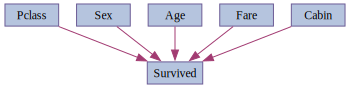

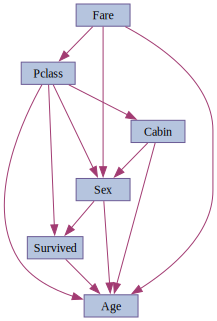

OutEdgeView([('Pclass', 'Cabin'), ('Pclass', 'Survived'), ('Pclass', 'Age'), ('Pclass', 'Sex'), ('Sex', 'Survived'), ('Sex', 'Age'), ('Fare', 'Pclass'), ('Fare', 'Age'), ('Fare', 'Sex'), ('Cabin', 'Age'), ('Cabin', 'Sex'), ('Survived', 'Age')])

NodeView(('Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Survived'))

In [349]:
showBN(model) # 自己设计的
showBN(best_model, save=True) # 最佳模型结构
best_model.edges() # 最佳模型的边
best_model.nodes() # 最佳模型的节点

# 训练模型

In [350]:
# 贝叶斯估计

import json


best_1 = BayesianNetwork(best_model.edges())
best_1.fit(train, estimator=BayesianEstimator, prior_type="BDeu")

# 创建一个字典以保存所有 CPD
cpds = {}

# 打印所有变量的条件概率分布并将其保存为 JSON
for cpd in best_1.get_cpds():
    cpds[cpd.variable] = {
        "values": cpd.values.tolist(),  # 获取 CPD 的值
        "states": cpd.state_names,  # 获取 CPD 的状态名称
    }

# 将 CPD 字典保存为 JSON 文件
with open("cpd_data.json", "w") as json_file:
    json.dump(
        cpds,
        json_file,
        indent=4,
        default=lambda x: x.tolist() if hasattr(x, "tolist") else x,
    )

print("所有 CPD 已以 JSON 格式保存。")


# 预测
predict_data = test.drop("Survived", axis=1)
y_pred = best_1.predict(predict_data)

predicted_survived = y_pred["Survived"]
actual_survived = test["Survived"].reset_index(drop=True)
predicted_survived = predicted_survived.reset_index(drop=True)

# 计算预测准确率
accuracy = (predicted_survived == actual_survived).sum() / len(actual_survived)
print(f"预测准确率: {accuracy}")

所有 CPD 已以 JSON 格式保存。


  0%|          | 0/57 [00:00<?, ?it/s]

预测准确率: 0.8547486033519553


In [351]:
# 最大似然估计
best_2 = BayesianNetwork(best_model.edges())
best_2.fit(train, estimator=MaximumLikelihoodEstimator)
predict_data = test.drop("Survived", axis=1)
y_pred = best_2.predict(predict_data)

predicted_survived = y_pred["Survived"]
actual_survived = test["Survived"].reset_index(drop=True)
predicted_survived = predicted_survived.reset_index(drop=True)

# 计算预测准确率
accuracy = (predicted_survived == actual_survived).sum() / len(actual_survived)
print(f"预测准确率: {accuracy}")

  0%|          | 0/57 [00:00<?, ?it/s]

预测准确率: 0.8547486033519553


# MCMC 估计后验分布

In [352]:
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import TabularCPD

# 进行采样
sampling = BayesianModelSampling(best_1)
samples = sampling.forward_sample(size=1000)  # 采样1000个样本

# 分析后验分布
print(samples)


  0%|          | 0/6 [00:00<?, ?it/s]

     Pclass  Cabin  Survived  Age  Sex  Fare
0         2      1         1    2    1     3
1         3      0         0    1    1     1
2         2      1         1    0    0     3
3         2      1         0    2    1     3
4         1      1         0    2    1     3
..      ...    ...       ...  ...  ...   ...
995       2      1         0    0    1     1
996       3      0         0    2    1     1
997       1      1         1    1    0     5
998       3      0         1    0    0     2
999       2      0         1    2    1     5

[1000 rows x 6 columns]


<Axes: title={'center': 'Pclass Posterior Distribution'}, xlabel='Pclass', ylabel='Probability'>

Text(0.0, 0.558, '0.5580')

Text(1.0, 0.242, '0.2420')

Text(2.0, 0.2, '0.2000')

Text(0.5, 0, 'Pclass')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Pclass Posterior Distribution')

<Axes: title={'center': 'Sex Posterior Distribution'}, xlabel='Sex', ylabel='Probability'>

Text(0.0, 0.643, '0.6430')

Text(1.0, 0.357, '0.3570')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Sex Posterior Distribution')

<Axes: title={'center': 'Age Posterior Distribution'}, xlabel='Age', ylabel='Probability'>

Text(0.0, 0.494, '0.4940')

Text(1.0, 0.389, '0.3890')

Text(2.0, 0.117, '0.1170')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Age Posterior Distribution')

<Axes: title={'center': 'Fare Posterior Distribution'}, xlabel='Fare', ylabel='Probability'>

Text(0.0, 0.5, '0.5000')

Text(1.0, 0.204, '0.2040')

Text(2.0, 0.116, '0.1160')

Text(3.0, 0.103, '0.1030')

Text(4.0, 0.047, '0.0470')

Text(5.0, 0.018, '0.0180')

Text(6.0, 0.012, '0.0120')

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Fare Posterior Distribution')

<Axes: title={'center': 'Cabin Posterior Distribution'}, xlabel='Cabin', ylabel='Probability'>

Text(0.0, 0.588, '0.5880')

Text(1.0, 0.412, '0.4120')

Text(0.5, 0, 'Cabin')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Cabin Posterior Distribution')

<Axes: title={'center': 'Survived Posterior Distribution'}, xlabel='Survived', ylabel='Probability'>

Text(0.0, 0.5, '0.5000')

Text(1.0, 0.5, '0.5000')

Text(0.5, 0, 'Survived')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Survived Posterior Distribution')

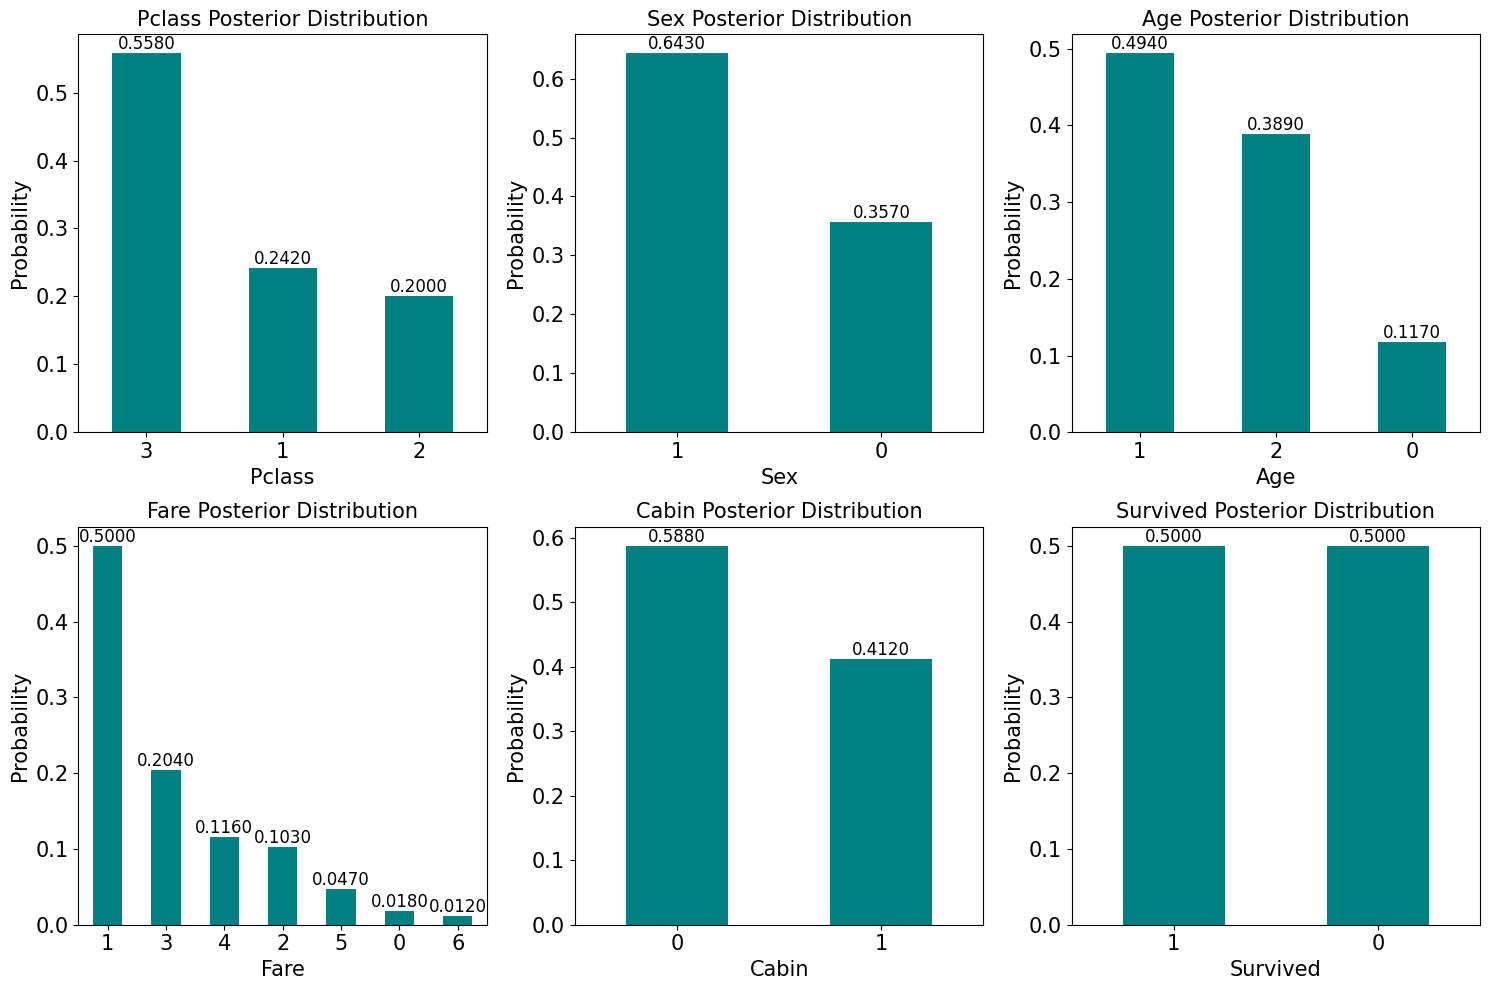

In [353]:
import matplotlib.pyplot as plt

cols = ["Pclass", "Sex", "Age", "Fare", "Cabin", "Survived"]

# 设置图形的行数和列数
n_cols = 3  # 每行显示 3 个图
n_rows = 2  # 每列显示 2 个图

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # 将多维数组扁平化以方便索引

# 绘制每个特征的后验分布
for idx, col in enumerate(cols):
    # 计算后验分布
    posterior_distribution = samples[col].value_counts(normalize=True)

    # 绘制条形图
    ax = axes[idx]
    posterior_distribution.plot(
        kind="bar",
        ax=ax,
        title=f"{col} Posterior Distribution",
        xlabel=col,
        ylabel="Probability",
        color="#008080",
        fontsize=15,
        rot=0
    )
    
    # 在每个条形上方显示数值
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
                f'{p.get_height():.4f}', 
                ha='center', va='bottom', fontsize=12)
    # 增大坐标轴标签的字体大小
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    ax.set_title(f"{col} Posterior Distribution", fontsize=15)  # 图标题的字体大小为 15
# 移除未使用的子图
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 自动调整子图间距
plt.savefig("posterior_distribution.png", dpi=300)  # 保存图片
plt.show()


# 保存模型

In [342]:
best_1.save("best_model.bif")